In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.ticker import PercentFormatter

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-talk')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [3]:
class ZTestAnalyzer:
    def __init__(self, x_data, y_data, sigma_x, sigma_y, alpha=0.05):
        """
        Инициализация параметров для Z-теста
        
        Параметры:
        x_data, y_data - массивы данных
        sigma_x, sigma_y - известные дисперсии
        alpha - уровень значимости
        """
        self.x = np.asarray(x_data)
        self.y = np.asarray(y_data)
        self.sigma_x = sigma_x
        self.sigma_y = sigma_y
        self.alpha = alpha
        self.n = len(x_data)
        self.m = len(y_data)
        
    def perform_test(self, alternative='greater'):
        """Выполняет Z-тест и возвращает результаты"""
        mean_diff = self.x.mean() - self.y.mean()
        std_error = np.sqrt(self.sigma_x/self.n + self.sigma_y/self.m)
        
        self.Z = mean_diff / std_error
        
        if alternative == 'greater':
            self.p_value = norm.sf(self.Z)
        elif alternative == 'two-sided':
            self.p_value = 2 * norm.sf(np.abs(self.Z))
        
        self.critical_value = norm.ppf(1 - self.alpha)
        
        return {
            'Z_score': self.Z,
            'p_value': self.p_value,
            'critical_value': self.critical_value,
            'decision': 'Reject H0' if self.p_value < self.alpha else 'Fail to reject H0'
        }
    
    def plot_power_curve(self, delta_max=5, n_points=200):
        """Строит кривую мощности теста"""
        delta_range = np.linspace(0, delta_max, n_points)
        denominator = np.sqrt(self.sigma_x/self.n + self.sigma_y/self.m)
        
        # Вычисляем мощность для каждого значения delta
        power = 1 - norm.cdf(
            norm.ppf(1 - self.alpha) - delta_range / denominator
        )
        
        # Находим delta, при котором мощность достигает 80%
        target_power = 0.8
        idx = np.argmin(np.abs(power - target_power))
        delta_80 = delta_range[idx]
        
        # Создаем график
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(delta_range, power, linewidth=2.5, 
                color='royalblue', label='Кривая мощности')
        
        # Добавляем вспомогательные линии
        ax.axvline(x=0, color='crimson', linestyle=':', 
                  linewidth=2, label='Нулевая гипотеза (Δ=0)')
        ax.axhline(y=self.alpha, color='gray', linestyle='--', alpha=0.5)
        ax.axhline(y=target_power, color='gray', linestyle='--', alpha=0.5)
        
        # Точка 80% мощности
        ax.scatter(delta_80, target_power, color='darkorange', s=120,
                  label=f'80% мощность при Δ={delta_80:.2f}')
        ax.vlines(x=delta_80, ymin=0, ymax=target_power, 
                 colors='darkorange', linestyles='dashed', alpha=0.5)
        
        # Настройки графика
        ax.set_title('Кривая мощности Z-теста\n(Альтернатива: $H_1: μ_x > μ_y$)', 
                    pad=20, fontsize=14)
        ax.set_xlabel('Разность средних (Δ = $μ_x - μ_y$)', fontsize=12)
        ax.set_ylabel('Мощность критерия', fontsize=12)
        ax.yaxis.set_major_formatter(PercentFormatter(1.0))
        ax.legend(loc='lower right', fontsize=11)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig

Результаты Z-теста:
Z-статистика: 0.9289
P-значение: 0.1765
Критическое значение (α=0.05): 1.6449
Вывод: Fail to reject H0


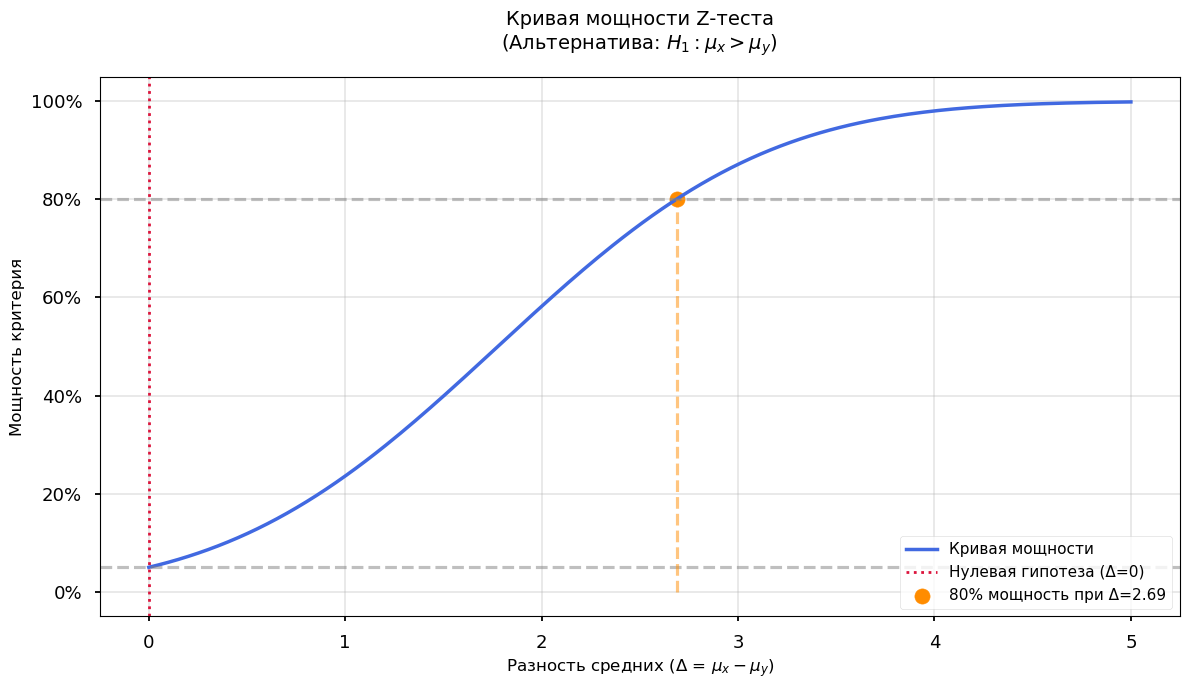

In [5]:
# Исходные данные
x_data = [-1.11, -6.10, 2.42]
y_data = [-2.29, -2.91]
sigma_x = 2
sigma_y = 1

# Создаем экземпляр анализатора
analyzer = ZTestAnalyzer(x_data, y_data, sigma_x, sigma_y)

# Выполняем тест
results = analyzer.perform_test()
print("Результаты Z-теста:")
print(f"Z-статистика: {results['Z_score']:.4f}")
print(f"P-значение: {results['p_value']:.4f}")
print(f"Критическое значение (α=0.05): {results['critical_value']:.4f}")
print(f"Вывод: {results['decision']}")

# Строим кривую мощности
fig = analyzer.plot_power_curve(delta_max=5)
plt.show()